# COGS 108 - Final Project

## Important

- ONE, and only one, member of your group should upload this notebook to TritonED. 
- Each member of the group will receive the same grade on this assignment. 
- Keep the file name the same: submit the file 'FinalProject.ipynb'.
- Only upload the .ipynb file to TED, do not upload any associted data. Make sure that for cells in which you want graders to see output that these cells have been executed.

## Group Members: Fill in the Student IDs of each group member here

Replace the lines below to list each persons full student ID, ucsd email and full name.

- A13748516, m2gamez@ucsd.edu, Marlon Gamez
- A13585428, sekessle@ucsd.edu, Sydney Kessler
- A14158920, mnn027@ucsd.edu, Michelle Nguyen

# Introduction and Background

Research question: Have songs with more negative sentiments/attitudes become more popular over time? As time has passed, are popular songs more negative than they used to be?

We hypothesized that yes, songs with negative sentiments have become more popular over the decades/years, and that over time, it is increasingly more likely for a negative song to be higher ranked than a song that is more positive. Negative songs create a sense of relatability for those who may be struggling, and with the rise of internet subcultures, it has become much easier for people to share their negative experiences and find support by reaching out to others online. Because of these factors, it may be the case that artists are creating more negative music to relate to their audiences, and in turn these songs have gotten more popular.

To investigate our question, we used sentiment analysis tools to process the lyrics of each song and look for trends involving song sentiment polarity and rank in relation to time. The library we’re using, TextBlob, processes groups of words and assigns it a sentiment polarity value from -1.0 to 1.0, with -1.0 being very negative, and 1.0 being very positive.

# Privacy/Ethics Considerations

The dataset used appears on Kaggle, and the ranking data that the dataset uses is made publicly available by Billboard. The dataset also gets the song lyrics from public lyric databases. Our project doesn’t pose any privacy issues in using this public data. 

One of the ethical considerations about this project is the potential for a mischaracterization of the public. We are using the trend in song lyric polarity to infer general public attitude on a larger scale, and errors in our interpretation could lead to a misinterpration of this generation (Although we don't believe any wrong results will have much impact, as this is a project for a college class that will likely not be seem by anyone other than you.)




In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
import nltk
from collections import Counter

# Data Description

The dataset we’ve chosen holds information on Billboard’s Year-End Hot 100 for the years 1965 to 2015. Each data entry contains the year the song was ranked, the song’s name, the artist’s name, the song’s rank for that year, and the song’s lyrics. There are 5100 entries in the dataset.


# Data Cleaning/Pre-processing

To clean the dataset, we removed the “Source” column, as it doesn’t provide any meaningful data for us to analyze. We also removed all entries in which the lyrics for the song are missing. These entries simply have “  “ (two space characters) in the original dataset. This resulted in 45 of the original 5100 entries being dropped.

In [2]:
df = pd.read_csv('billboard_lyrics.csv', encoding='latin-1')

# Drop unnecessary column "Source"
df = df.drop(['Source'], axis=1)

# Drop all rows that contain empty lyrics field
df = df[df.Lyrics != '  ']

In [3]:
df.head()

,Rank,Song,Artist,Year,Lyrics
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...


### Next we used the TextBlob library to create a function which return the song's sentiment/polarity. We added two columns to our dataframe: one for the polarity of the songs lyrics, and the other for the polarity of the title. 

In [5]:
def string_polarity(string):
    string = str(string)
    tb = TextBlob(string)
    return tb.sentiment.polarity

df['lyric_polarity'] = df['Lyrics'].apply(string_polarity)
df['title_polarity'] = df['Song'].apply(string_polarity)

In [6]:
df.head()

,Rank,Song,Artist,Year,Lyrics,lyric_polarity,title_polarity
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,-0.102083,0.0
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,0.302778,0.0
3,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,-0.155556,0.0
4,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,0.111534,0.0
5,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,0.330833,0.0


# Data Visualizations

- We started by creating a scatterplor for each decade from the 1960s to the 2010s. For all the years in each decade (1000 samples over 10 years, or less for the 1960s and 2010s), we graphed a scatter plot of each song's rank vs. sentiment.  

In [7]:
# Split out into decades
df_1960 = df[(df.Year >= 1965) & (df.Year <=1969)]
df_1970 = df[(df.Year >= 1970) & (df.Year <=1979)]
df_1980 = df[(df.Year >= 1980) & (df.Year <=1989)]
df_1990 = df[(df.Year >= 1990) & (df.Year <=1999)]
df_2000 = df[(df.Year >= 2000) & (df.Year <=2009)]
df_2010 = df[(df.Year >= 2010) & (df.Year <=2015)]

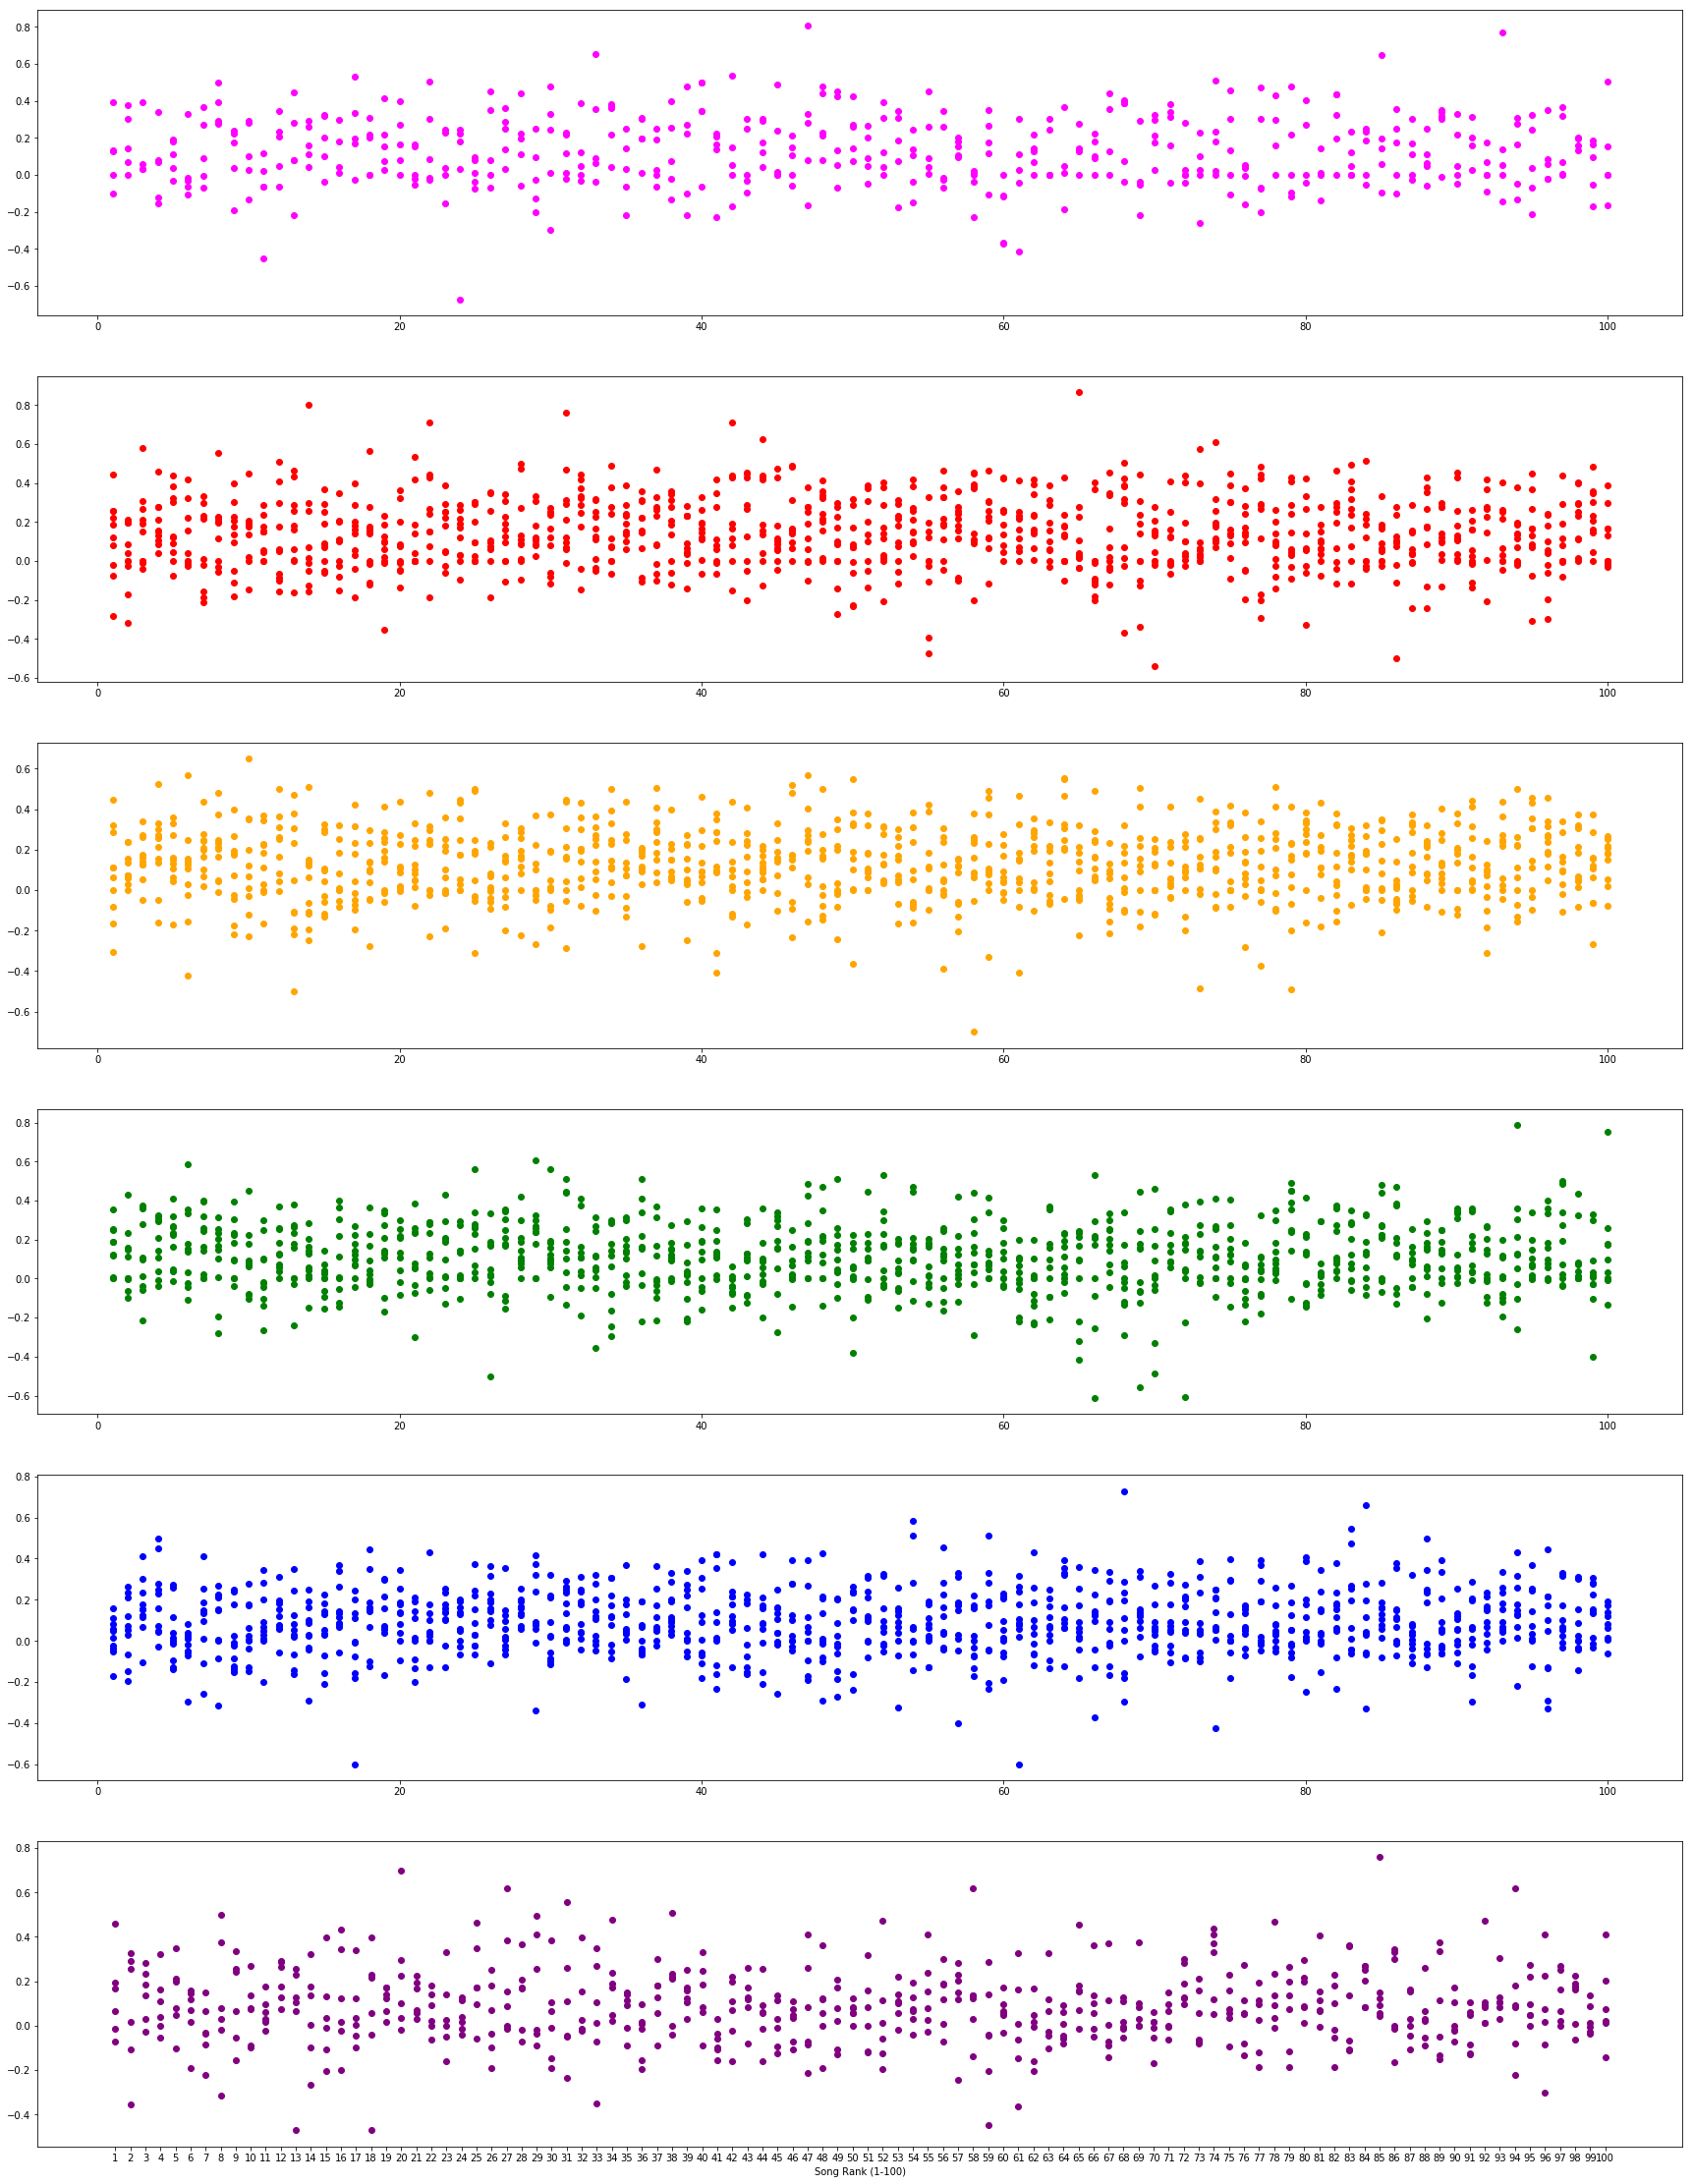

In [14]:
# Plot rank and polarity by decade
fig = plt.figure(figsize=(30, 40))

ax1 = plt.subplot(6, 1, 1)
ax2 = plt.subplot(6, 1, 2)
ax3 = plt.subplot(6, 1, 3)
ax4 = plt.subplot(6, 1, 4)
ax5 = plt.subplot(6, 1, 5)
ax6 = plt.subplot(6, 1, 6, xticks=range(1,101))
ax1.scatter(x=df_1960['Rank'], y=df_1960['lyric_polarity'], color='fuchsia')
ax2.scatter(x=df_1970['Rank'], y=df_1970['lyric_polarity'], color='red')
ax3.scatter(x=df_1980['Rank'], y=df_1980['lyric_polarity'], color='orange')
ax4.scatter(x=df_1990['Rank'], y=df_1990['lyric_polarity'], color='green')
ax5.scatter(x=df_2000['Rank'], y=df_2000['lyric_polarity'], color='blue')
ax6.scatter(x=df_2010['Rank'], y=df_2010['lyric_polarity'], color='purple')
ax6.set_xlabel('Song Rank (1-100)')

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
fig.add_subplot(ax5)
fig.add_subplot(ax6)

plot.show()

### Looking at these scatterplots, it appeared a song's rank had no correlation with its sentiment and that that didn't vary over the years.  


### We then looked at correlations to see if those aligned with our visualization. 

In [15]:
# Get correlation between rank and polarity by decade
print(df_1960[['Rank', 'lyric_polarity']].corr())
print(df_1970[['Rank', 'lyric_polarity']].corr())
print(df_1980[['Rank', 'lyric_polarity']].corr())
print(df_1990[['Rank', 'lyric_polarity']].corr())
print(df_2000[['Rank', 'lyric_polarity']].corr())
print(df_2010[['Rank', 'lyric_polarity']].corr())

                    Rank  lyric_polarity
Rank            1.000000       -0.021251
lyric_polarity -0.021251        1.000000
                    Rank  lyric_polarity
Rank            1.000000       -0.008123
lyric_polarity -0.008123        1.000000
                    Rank  lyric_polarity
Rank            1.000000        0.009009
lyric_polarity  0.009009        1.000000
                    Rank  lyric_polarity
Rank            1.000000       -0.037268
lyric_polarity -0.037268        1.000000
                    Rank  lyric_polarity
Rank            1.000000        0.029342
lyric_polarity  0.029342        1.000000
                   Rank  lyric_polarity
Rank            1.00000        -0.01187
lyric_polarity -0.01187         1.00000


## Analysis

The scatterplots for all of the decades in our dataset (1960 to 2010) produced similar results in the way that there seemed to be no apparent relationship with the lyric sentiment polarity of the Top 100 songs and the rank of the songs. We had expected there to be a somewhat linear relationship, with the more popular songs (closer to the number 1 in rank) tending to have a lower sentiment polarity (AKA more negative sentiment). This would have supported our hypothesis that negative songs are likely to be considered more popular. 

We also expected the plots to produce a more strongly negative relationship with each increasing decade, which would indicate that popular songs have gotten more negative over the years. However, from just looking at the visualization, in which each decade has a somewhat similar shape of evenly scattered polarities, there is no definite conclusion to be made about the tendency for top songs to be more negative, nor the amount of negative popular songs increasing over time. 

We also can infer much from looking at the correlation between polarity and rank that they are not related. No decade seemed to have a stronger correlation between rank and sentiment polarity than any of the others, with all correlation values lying within the range of -0.1 to 0.1. 

One thing to note is that there is a growing number of highly negative polarities (lower than -0.4) amongst the higher ranked songs as the decades go on. For example, in 1960, there are notable negative polarities for songs ranked approximately #12 and #25. In 2010, there are notable negative polarities for several top songs, some of them as highly ranked as #2, #13, and #18. This can be an indicator that although that is no clear relationship between a song’s rank and a song’s sentiment amongst the decades, there still seems to be a general liking towards negative songs that grows with each decade.

### We then calculated and plotted the mean lyric sentiment polarity amongst the Top 100 songs of each year.

In [16]:
print(df_1960[['lyric_polarity']].mean())
print(df_1970[['lyric_polarity']].mean())
print(df_1980[['lyric_polarity']].mean())
print(df_1990[['lyric_polarity']].mean())
print(df_2000[['lyric_polarity']].mean())
print(df_2010[['lyric_polarity']].mean())

lyric_polarity    0.127185
dtype: float64
lyric_polarity    0.13947
dtype: float64
lyric_polarity    0.121931
dtype: float64
lyric_polarity    0.106438
dtype: float64
lyric_polarity    0.088822
dtype: float64
lyric_polarity    0.08591
dtype: float64


In [26]:
df_year = pd.DataFrame(df['Year'].unique(), columns=['year'])

In [27]:
def average_polarity(year):
    return df[df.Year == year]['lyric_polarity'].mean()

df_year['mean_lyric_polarity'] = df_year['year'].apply(average_polarity)

In [28]:
df_year.head()

,year,mean_lyric_polarity
0,1965,0.103386
1,1966,0.122073
2,1967,0.156737
3,1968,0.110703
4,1969,0.143552


In [29]:
df_year.corr()

,year,mean_lyric_polarity
year,1.000000,-0.679637
mean_lyric_polarity,-0.679637,1.000000


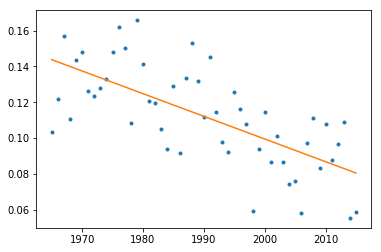

In [30]:
x = df_year['year']
y = df_year['mean_lyric_polarity']

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.show()


## Analysis

The plot of all of the average lyric polarities for every year shows a negative, linear trend. With each consecutive year from 1960 to 2015, the average lyric polarity may increase or decrease, but the overall trend over this range of time is this linearly negative relationship, as demonstrated with the line of best fit. This indicates that the Top 100 songs of each year generally had a lower lyric polarity after each gradual year, telling us that popular song lyrics tend to be more negative in sentiment over time. This is significant since it allows us to draw conclusions about how the most popular songs portray increasingly negative emotions, which allows us to understand the human population better and understand what appeals to their emotions and musical likings. 

### We did the same process of splitting the data into decades to plot song rank with title sentiment polarity, rather than lyric sentiment polarity, for each decade 

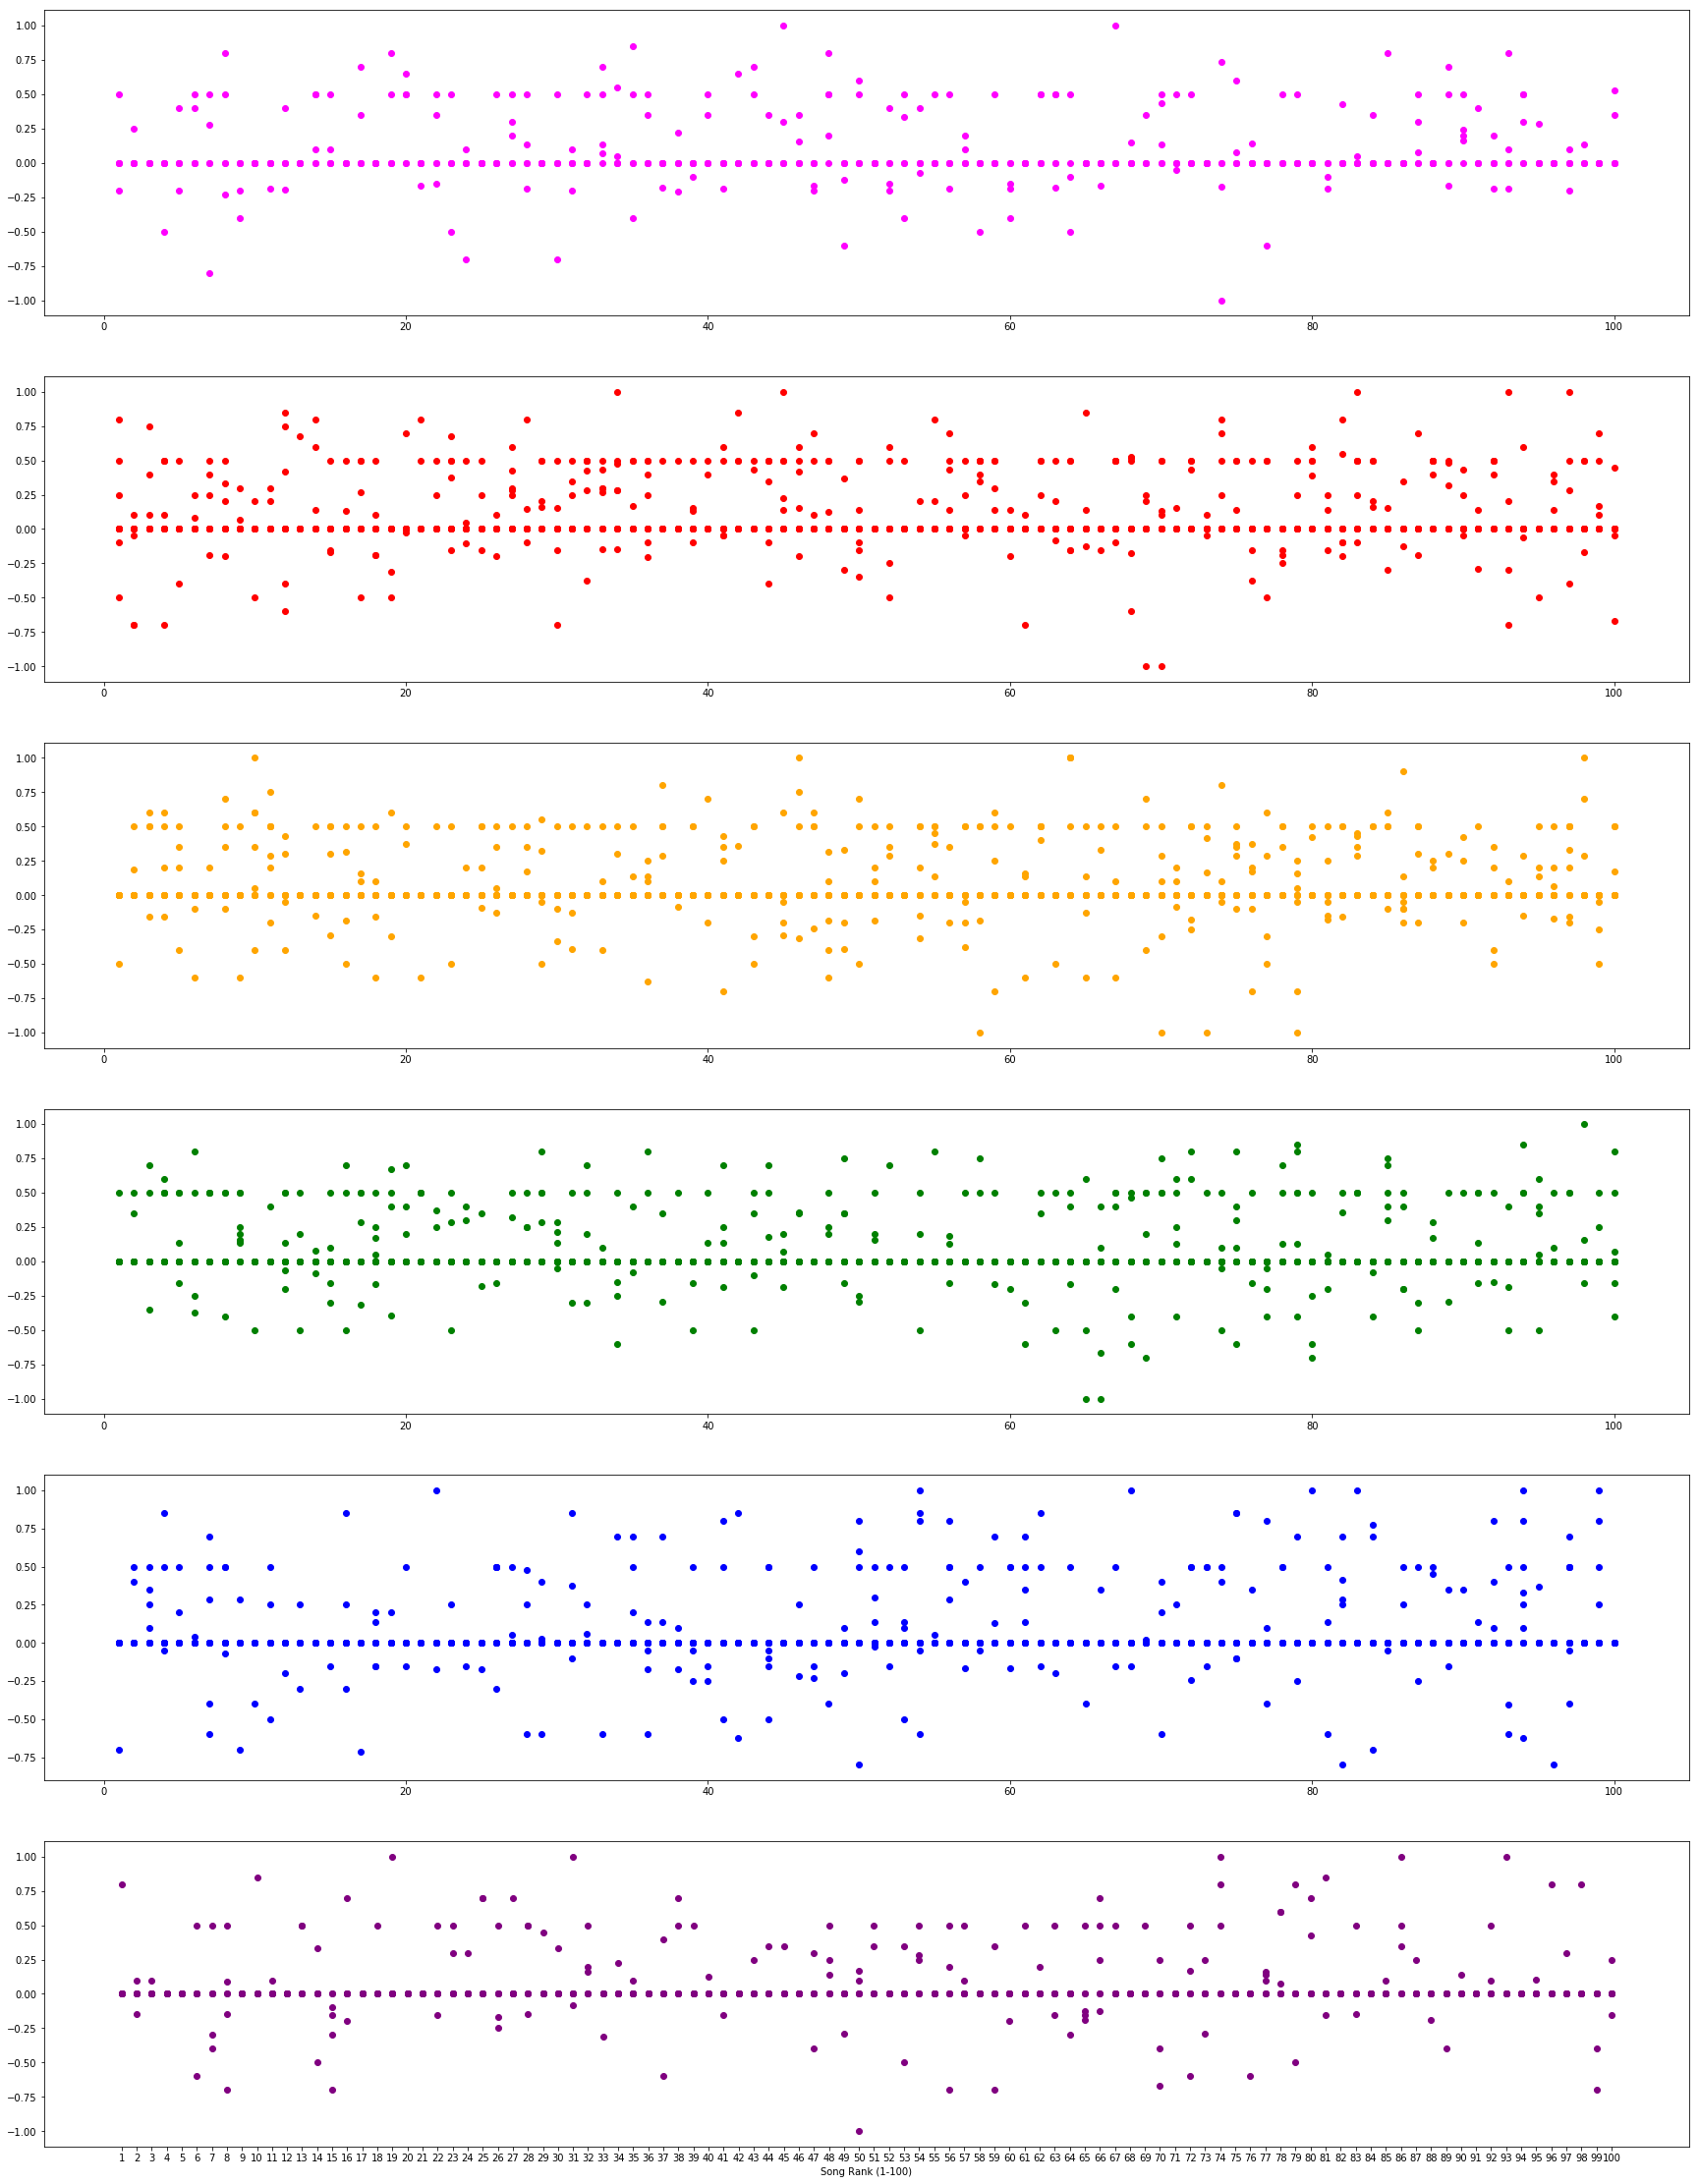

In [31]:
# Plot rank and title_polarity by decade
fig = plt.figure(figsize=(30, 40))

ax1 = plt.subplot(6, 1, 1)
ax2 = plt.subplot(6, 1, 2)
ax3 = plt.subplot(6, 1, 3)
ax4 = plt.subplot(6, 1, 4)
ax5 = plt.subplot(6, 1, 5)
ax6 = plt.subplot(6, 1, 6, xticks=range(1,101))
ax1.scatter(x=df_1960['Rank'], y=df_1960['title_polarity'], color='fuchsia')
ax2.scatter(x=df_1970['Rank'], y=df_1970['title_polarity'], color='red')
ax3.scatter(x=df_1980['Rank'], y=df_1980['title_polarity'], color='orange')
ax4.scatter(x=df_1990['Rank'], y=df_1990['title_polarity'], color='green')
ax5.scatter(x=df_2000['Rank'], y=df_2000['title_polarity'], color='blue')
ax6.scatter(x=df_2010['Rank'], y=df_2010['title_polarity'], color='purple')
ax6.set_xlabel('Song Rank (1-100)')

fig.add_subplot(ax1)
fig.add_subplot(ax2)
fig.add_subplot(ax3)
fig.add_subplot(ax4)
fig.add_subplot(ax5)
fig.add_subplot(ax6)

## Analysis

The plots of the mean title polarity and song rank for each decade show the large variety of sentiment for the top songs’ titles. For each decade, there are plenty of top songs with a positive title polarity, as well as a negative title polarity. There is, however, a notably higher amount of songs with a more positive title sentiment, as indicated by how the scatterplot is much more populated above the 0.00 mark on the y-axis (title polarity). It is interesting to relate this back to the lyric sentiment of the Top 100 songs, since the lyric sentiment was evenly split between positive and negative, whereas the title sentiment is more obviously positive. This mismatch in sentiment between song lyrics and song title is most likely due to the difference in the amount of words -- it is likely easier for song lyrics to express a more negative sentiment with more words, compared to the song title expressing a highly negative sentiment with very few words (about one to ten).

### We then calculated and plotted the mean title sentiment polarity amongst the Top 100 songs of each year.

In [23]:
print(df_1960[['title_polarity']].mean())
print(df_1970[['title_polarity']].mean())
print(df_1980[['title_polarity']].mean())
print(df_1990[['title_polarity']].mean())
print(df_2000[['title_polarity']].mean())
print(df_2010[['title_polarity']].mean())

title_polarity    0.070601
dtype: float64
title_polarity    0.081405
dtype: float64
title_polarity    0.056308
dtype: float64
title_polarity    0.058219
dtype: float64
title_polarity    0.044455
dtype: float64
title_polarity    0.043897
dtype: float64


In [32]:
def average_polarity(year):
    return df[df.Year == year]['title_polarity'].mean()

df_year['mean_title_polarity'] = df_year['year'].apply(average_polarity)

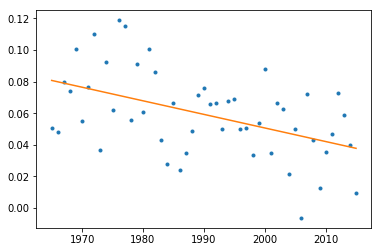

In [33]:
x = df_year['year']
y = df_year['mean_title_polarity']

m, b = np.polyfit(x, y, 1)
plt.plot(x, y, '.')
plt.plot(x, b + m * x, '-')

plt.show()

## Analysis

Plotting the average title polarity of songs for each year in our dataset showed a linearly negative trend, similar to the average lyric polarity. This tells us that over time, popular song titles are more likely to express a more negative sentiment. One thing to note is that the negative trend for average title polarity is not as strong as that for average lyrical polarity, meaning the average sentiment for the title of the Top 100 songs does not decrease as much over the years as the average lyric polarity does. This is likely due to, again, the amount of words in the song title compared to in the song lyrics -- it is likely more difficult for song titles to get substantially more negative given the amount of words they consist of, compared to how song lyrics can get much more negative.

# Sentiment vs. Rank by Artist
Next we examined if there is any correlation between sentiment and rank per artist. That is, if one artist's higher ranked songs tend to have a more negative sentiment. 

- For this, we looked at the Top 10 artists. We define the Top 10 as the artists who appear most frequently on Billboard's Hot 100. 

In [181]:
#use Counter object to get the top 10
BEST = Counter(df['Artist']).most_common(10)
best_artists = list(dict(BEST).keys()) #just the artists' names
best_artists_num = list(dict(BEST).values()) #number of songs each artist has in the Hot 100

In [182]:
#get average sentiment for each artist
def ave_sent_artist(artist):
    return df[df.Artist == artist]['sentiment_polarity'].mean()

#put the average sentiments in a column
artist_ave_sent = []
for i, artist in enumerate(best_artists):
    artist_ave_sent.append(ave_sent_artist(artist))

#create a df contain the Top 10's names, number of songs, and their average sentiment
d = {'Artist':best_artists,'Num Songs':best_artists_num,'Ave Sentiment':artist_ave_sent }
df_topArtists = pd.DataFrame(data=d)

df_topArtists

,Artist,Ave Sentiment,Num Songs
0,madonna,0.103193,35
1,elton john,0.100096,26
2,mariah carey,0.086252,25
3,stevie wonder,0.121755,22
4,michael jackson,0.079332,22
5,janet jackson,0.160922,22
6,whitney houston,0.238006,19
7,rihanna,0.197967,19
8,taylor swift,0.008919,19
9,the beatles,0.097311,17


### It looked like all of the average sentiments are fairly close to 0. This means that there isn't an overwhelmingly positive or negative slant to any popular artists' songs. 
- Interestingly, all the the top artists' average sentiments are above 0, meaning that the most popular artists all have a slightly positive slant to their songs. 

### We graphed these values to see if there's any correlation between the most popular artists (the ones who have more hit songs) and the less popular ones (who have less hit songs).

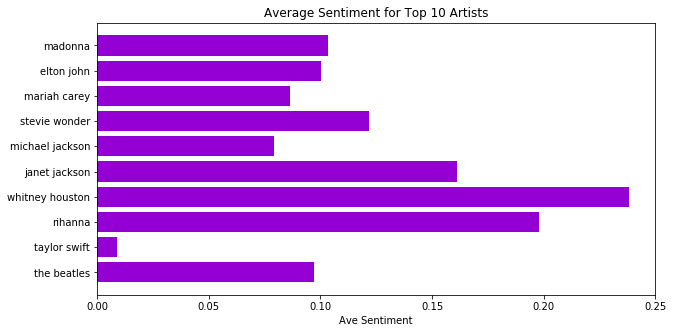

In [183]:
fig, axs = plt.subplots(1, 1, figsize=(10, 5))

pos = np.arange(10)+.5

ax1 = axs.barh(pos, df_topArtists['Ave Sentiment'][::-1], color='darkviolet')
axs.set_title('Average Sentiment for Top 10 Artists')
axs.set_xlabel('Ave Sentiment')
plt.yticks(pos, df_topArtists['Artist'][::-1])

plt.show()

### It didn't appear like there was any correlation between popularity of an artist and the average sentiment of their hit songs. We ran a correlation to check this. 

In [174]:
df_topArtists.corr()

,Ave Sentiment,Num Songs
Ave Sentiment,1.000000,-0.176871
Num Songs,-0.176871,1.000000


### There is a weak negative correlation (-0.18) between averange sentiment and number of songs. 
- This means that on average, more popular artists have slightly more negative songs than less popular artists. We don't think this correlation is strong enough to make any claims, though. 

### Next, we plotted the song rank vs. lyric sentiment for each artist.


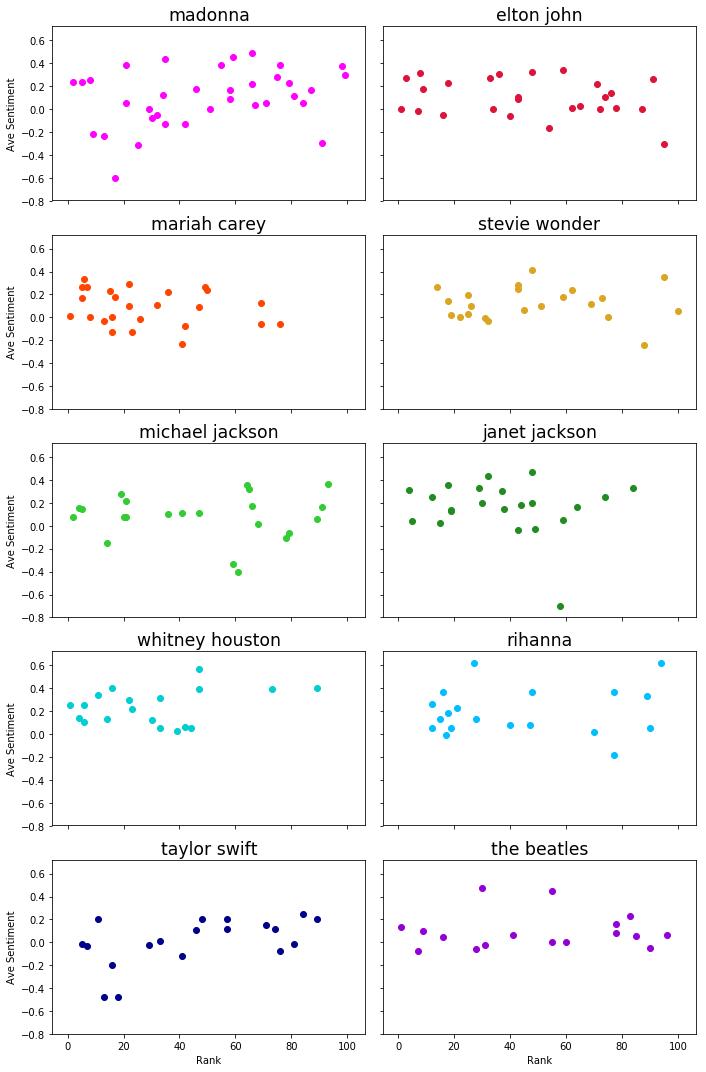

In [319]:
# Plot rank and sentiment by artist
fig, axs = plt.subplots(5, 2, sharex=True, sharey=True, figsize=(10, 15))

title = {'fontsize': 'xx-large','fontvariant':'small-caps','verticalalignment': 'baseline'}

axs[0,0].scatter(x=df['Rank'][df['Artist']==best_artists[0]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[0]], color='fuchsia')
axs[0,0].set_title(best_artists[0], fontdict = title)
axs[0,0].set_ylabel('Ave Sentiment')

axs[0,1].scatter(x=df['Rank'][df['Artist']==best_artists[1]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[1]], color='crimson')
axs[0,1].set_title(best_artists[1], fontdict = title)

axs[1,0].scatter(x=df['Rank'][df['Artist']==best_artists[2]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[2]], color='orangered')
axs[1,0].set_title(best_artists[2], fontdict = title)
axs[1,0].set_ylabel('Ave Sentiment')

axs[1,1].scatter(x=df['Rank'][df['Artist']==best_artists[3]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[3]], color='goldenrod')
axs[1,1].set_title(best_artists[3], fontdict = title)

axs[2,0].scatter(x=df['Rank'][df['Artist']==best_artists[4]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[4]], color='limegreen')
axs[2,0].set_title(best_artists[4], fontdict = title)
axs[2,0].set_ylabel('Ave Sentiment')

axs[2,1].scatter(x=df['Rank'][df['Artist']==best_artists[5]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[5]], color='forestgreen')
axs[2,1].set_title(best_artists[5], fontdict = title)

axs[3,0].scatter(x=df['Rank'][df['Artist']==best_artists[6]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[6]], color='darkturquoise')
axs[3,0].set_title(best_artists[6], fontdict = title)
axs[3,0].set_ylabel('Ave Sentiment')

axs[3,1].scatter(x=df['Rank'][df['Artist']==best_artists[7]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[7]], color='deepskyblue')
axs[3,1].set_title(best_artists[7], fontdict = title)

axs[4,0].scatter(x=df['Rank'][df['Artist']==best_artists[8]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[8]], color='darkblue')
axs[4,0].set_title(best_artists[8], fontdict = title)
axs[4,0].set_ylabel('Ave Sentiment')
axs[4,0].set_xlabel('Rank')

axs[4,1].scatter(x=df['Rank'][df['Artist']==best_artists[9]], 
                 y=df['sentiment_polarity'][df['Artist']==best_artists[9]], color='darkviolet')
axs[4,1].set_title(best_artists[9], fontdict = title)
axs[4,1].set_xlabel('Rank')


fig.tight_layout()
plt.show()

### It appeared that, just like the rank vs. sentiment for lyrics by decade and song title by decade, there is no trend.
- For each of these artists, there did not look to be a correlation between rank of song and song sentiment. Considering our earlier findings the relationship between rank and sentiment, this result is expected.

### However, these are the most popular artists for all of 1964-2015. Does the average sentiment for the most popular artists change per decade? We tried to answer this question as well.

In [320]:
#top 10 artists per decade
BEST_1960 = Counter(df_1960['Artist']).most_common(10)
BEST_1970 = Counter(df_1970['Artist']).most_common(10)
BEST_1980 = Counter(df_1980['Artist']).most_common(10)
BEST_1990 = Counter(df_1990['Artist']).most_common(10)
BEST_2000 = Counter(df_2000['Artist']).most_common(10)
BEST_2010 = Counter(df_2010['Artist']).most_common(10)

In [ ]:
def best_by_year(df):
    best_artists = list(dict(df).keys()) #just the artists' names
    return best_artists

# lists of artists and num of popular songs
best_1960 = best_by_year(BEST_1960)
best_1970 = best_by_year(BEST_1970)
best_1980 = best_by_year(BEST_1980)
best_1990 = best_by_year(BEST_1990)
best_2000 = best_by_year(BEST_2000)
best_2010 = best_by_year(BEST_2010)

In [270]:
#make a dataframe for each decade with top artists and ave values for those artists
def ave_per_artist(artist, yearStart, yearEnd):
    theArtist = df[(df.Artist == artist)&(df.Year >= yearStart) & (df.Year <=yearEnd)]
    return theArtist['sentiment_polarity'].mean()

def artist_sent_year(df, yearStart,yearEnd):
    artist_ave_sent = []
    for i, artist in enumerate(df):
        artist_ave_sent.append(ave_per_artist(artist,yearStart,yearEnd ))
    return artist_ave_sent

best_1960_values = artist_sent_year(best_1960, 1965,1969)
a = {'Year':1960,'Artist':best_1960,'Ave Sentiment':best_1960_values}
df_topArtists_1960 = pd.DataFrame(data=a)

best_1970_values = artist_sent_year(best_1970, 1970,1979)
b = {'Year':1970,'Artist':best_1970,'Ave Sentiment':best_1970_values}
df_topArtists_1970 = pd.DataFrame(data=b)

best_1980_values = artist_sent_year(best_1980, 1980,1989)
c = {'Year':1980,'Artist':best_1980,'Ave Sentiment':best_1980_values}
df_topArtists_1980 = pd.DataFrame(data=c)

best_1990_values = artist_sent_year(best_1990, 1990,1999)
d = {'Year':1990,'Artist':best_1990,'Ave Sentiment':best_1990_values}
df_topArtists_1990 = pd.DataFrame(data=d)

best_2000_values = artist_sent_year(best_2000, 2000,2009)
e = {'Year':2000,'Artist':best_2000,'Ave Sentiment':best_2000_values}
df_topArtists_2000 = pd.DataFrame(data=e)

best_2010_values = artist_sent_year(best_2010, 2010,2015)
f = {'Year':2010,'Artist':best_2010,'Ave Sentiment':best_2010_values}
df_topArtists_2010 = pd.DataFrame(data=f)


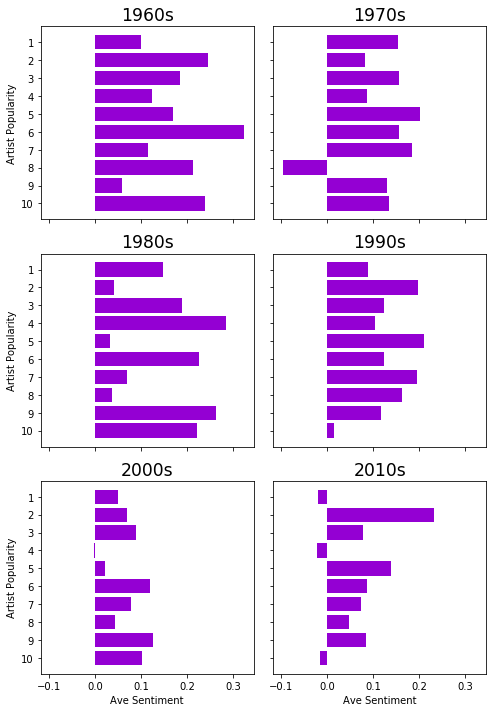

In [307]:
fig, axs = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(7, 10))

pos = np.arange(10)+.5

axs[0,0].set_ylabel('Artist Popularity')

axs[0,0].barh(pos, df_topArtists_1960['Ave Sentiment'][::-1], color='darkviolet')
axs[0,0].set_title("1960s", fontdict = title)
axs[0,0].set_ylabel('Artist Popularity')

axs[0,1].barh(pos, df_topArtists_1970['Ave Sentiment'][::-1], color='darkviolet')
axs[0,1].set_title("1970s", fontdict = title)

axs[1,0].barh(pos, df_topArtists_1980['Ave Sentiment'][::-1], color='darkviolet')
axs[1,0].set_title("1980s", fontdict = title)
axs[1,0].set_ylabel('Artist Popularity')

axs[1,1].barh(pos, df_topArtists_1990['Ave Sentiment'][::-1], color='darkviolet')
axs[1,1].set_title("1990s", fontdict = title)

axs[2,0].barh(pos, df_topArtists_2000['Ave Sentiment'][::-1], color='darkviolet')
axs[2,0].set_title("2000s", fontdict = title)
axs[2,0].set_xlabel('Ave Sentiment')
axs[2,0].set_ylabel('Artist Popularity')

axs[2,1].barh(pos, df_topArtists_2010['Ave Sentiment'][::-1], color='darkviolet')
axs[2,1].set_title("2010s", fontdict = title)
axs[2,1].set_xlabel('Ave Sentiment')

#axs.set_title('Average Sentiment for Top 10 Artists')

plt.yticks(pos, [10,9,8,7,6,5,4,3,2,1])
fig.tight_layout()
plt.show()

It looked like there was a negative trend throughout the years. Although there doesn't appear to be a correlation between popularity and sentiment, songs by the most popular artists of each year have gotten more negative. Considering the results from the previous section that found an increasingly negative sentiment as the years have gone by, this result is expected. 

### We then looked at the average of most popular artists' averages per decade. 

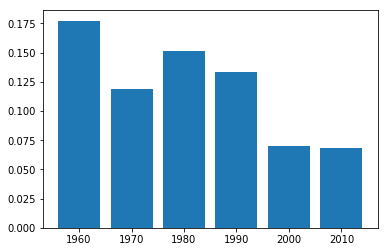

In [313]:
overall_ave_year = [df_topArtists_1960['Ave Sentiment'].mean(), df_topArtists_1970['Ave Sentiment'].mean(), \
                    df_topArtists_1980['Ave Sentiment'].mean(), df_topArtists_1990['Ave Sentiment'].mean(), \
                    df_topArtists_2000['Ave Sentiment'].mean(), df_topArtists_2010['Ave Sentiment'].mean()]

fig, ax = plt.subplots()
x = np.arange(6)
plt.bar(x, overall_ave_year)
plt.xticks(x, ('1960', '1970', '1980', '1990', '2000','2010'))
plt.show()


We see a similar trend here as we see with the overall sample. 

# Conclusion and Discussion

From our analyses, we conclude that a song's sentiment does not have an affect on its popularity (in terms of rank) when it comes to popular songs. For each decade, the lyric sentiment is very varied for all songs ranked 1 to 100 -- there is no indicator that a more popular song (closer to rank 1) has a more negative sentiment. Our scatterplots are scattered, for all song lyrics, song titles, and song lyrics for the most popular artists, and our correlations are weak. 

What we can make conclusions on is the general sentiment of popular songs over the decades. Despite not being able to conclude that an individual higher ranked song is likely to have a more negative sentiment (as measured through lyric sentiment), we are able to say that the general sentiment of popular music, which is calculated by considering all of the Top 100 songs as one entity rather than as 100 parts, grows more negative over time. In other words, on average, a popular song is more likely to be more negative in sentiment with each consecutive year. 

To elaborate further on the difference of these aforementioned conclusions, we cannot say that an individual top 1960 song with a negative sentiment likely would have been ranked higher in 2010 simply on the basis that negative songs have become more popular over time. However, we can say that all the Top 100 songs in 1960 as whole will generally be less negative than the Top 100 songs in 2010, since our data shows a clear negative trend for average lyric polarities over the years. In other words, popular music in general has a more negative sentiment with each coming year.

This allows us to draw conclusions not on how people enjoy negative songs more than positive songs (which would be the case if we could conclude that songs with a more negative sentiment are more highly ranked than songs with a more positive sentiment), but rather on the people’s general affinity towards negative songs, as well as the music industry and popular music as a whole. Our data shows that overall, popular songs will continue to be more negative in sentiment with time. One possible reason behind this is that people are increasingly more receptive to songs that appeal to negative emotion, i.e. some personal hardship or a classic heartbreak, and therefore will enjoy a song with a higher negative sentiment more, and therefore making these increasingly negative songs more popular over time. This reason enables us to make a statement about the human desire to be understood and to be related to, which gives us a greater understanding of society and how to produce forms of entertainment (i.e. music) for society to enjoy.

Another possible reason is not that negative songs are more openly received, but rather, there could just be more negative songs being created and released. A higher amount of negative songs being created would reasonably explain the more average negative sentiment of popular songs of each year due to the fact that it is more likely for a negative song to reach the Top 100 charts if there are simply more negative songs to choose from. This brings up discussion on why artists are more likely to produce music with a more negative lyric sentiment. The music industry is much more than a simple form of entertainment for the consumers -- it also serves as a means of support and relief for the artists. It is possible that artists view music more as a way to express their pains, and to be relieved in the fact that other people can also relate to these pains. This makes a statement on the music industry’s effect on the mental health of both the artists and the consumers (AKA the music-listeners). For both the artist and the fans, music potentially is a means of sharing each other’s struggles, and therefore plays a huge role in people’s lives.

With this research, we had hoped to gain some knowledge on any possible changes in how people receive song sentiment in order to better understand what better appeals to our society, and to discuss why that is so. With our data analysis, we have learned that it seems like people are increasingly accepting towards songs with a more negative sentiment. We believe it to be on the basis that the song creates a sense of relatability and common struggles, which explains how sentiments and emotions play an important role in people act in our society. We also gained insight on how music is more than pure objective entertainment, and rather also incorporates a higher level subjective side of human emotions. With our findings, we hope to express the importance of music in our society, as well as provide a better understanding of what people enjoy and desire, and why they do so.



### Contributions:

- Michelle: Analysis for Rank vs Lyric Sentiment Polarity, Mean Lyric Sentiment Polarity, Rank vs Title Sentiment Polarity, & Mean Title Sentiment Polarity; Conclusion/Discussion
- Marlon: Coding for Analysis for Rank vs Lyric Sentiment Polarity, Mean Lyric Sentiment Polarity, Rank vs Title Sentiment Polarity, & Mean Title Sentiment Polarity
- Sydney: Sentiment vs. Rank by Artist - code and analysis